<a href="https://colab.research.google.com/github/Harlequelrah/Learning_data_analysis/blob/main/Learning_data_analysis/Courses/Partie_3/Comprenez_les_mesures_de_dispersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# La variance empirique :

La variance empirique permet de mesurer les écarts à la moyenne.

On a :
- la variance empirique (biaisée) :

  ```python
     data['montant'].var(ddof=0)
  ```

- la variance empirique (non biaisée)

  ```python
     data['montant'].var(ddof=1)
     # ddof=1 par défaut
  ```

# Ecart type
 C'est la racine de la variance . On a alors le resultat dans une unité plus intelligible .


  ```python
     data['montant'].std()
  ```

# Coefficient de variation

L'ecart type n'a pas le même impact suivant les distributions . ex : ecart type de 6.5min sur un trajet de 1h n'as pas la même signification si le trajet est de 24h .

On a le coefficient de variation CV pour y remédier .

  ```python
     data['montant'].std() / data['montant'].mean()
  ```

# L'ecart Interquartile

C'est la différence entre le 3ème et le 1er quartile.

IQ = Q3-Q1

# La boite à moustache (boxplot)

Elle est délimitée par Q1 et Q3 . Les outliers sont les valeurs en dessous de Q1-1.5IQ et au dessus de Q1+1.5IQ

  ```python
     data.boxplot(column='montant',vert=False)
     # vert = False pour que la boîte à moustache soit pas à la verticale .
     plt.show()
  ```

# Ecart moyen absolu :

Voici la version avec la médiane.

$
EMA = \frac{1}{n} \sum_{i=1}^{n} \lvert x_i - \mathrm{Med} \rvert
$

On a aussi une version avec les écarts absolus par rapport à la médiane.


# Pratique

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv(
    "https://raw.githubusercontent.com/Harlequelrah/Learning_data_analysis/refs/heads/main/Learning_data_analysis/Nettoyez_et_analysez_votre_jeu_de_données/data/operations_clean.csv",
    parse_dates=[0],
)
data.head()

,date_operation,libelle,montant,solde_avt_ope,categ
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE


In [ ]:
# Ecart-Type
data['montant'].std()

176.08985785851203

In [ ]:
# Variance
data['montant'].var(ddof=1)

31007.638040630973

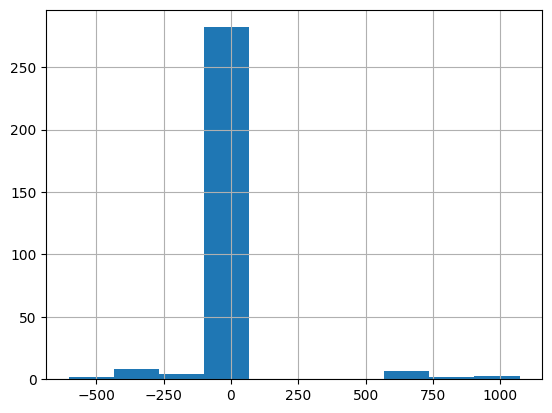

In [ ]:
# Histogramme

data['montant'].hist()
plt.show()

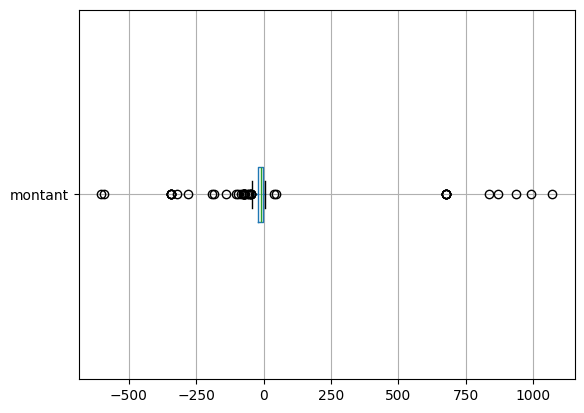

In [ ]:
# Boite à moustache
data.boxplot(column='montant',vert=False)
plt.show()

## Calculons pour chaque catégorie :

- l'ecart type ;

- la variance ;

- un histogramme ;

- une boîte à moustache des montants

--------------------
Catégorie : AUTRE
moy:
 23.433207547169808
med:
 -8.31
mod:
 0   -1.6
Name: montant, dtype: float64
var:
 40401.82999254187
eca:
 201.00206464746046


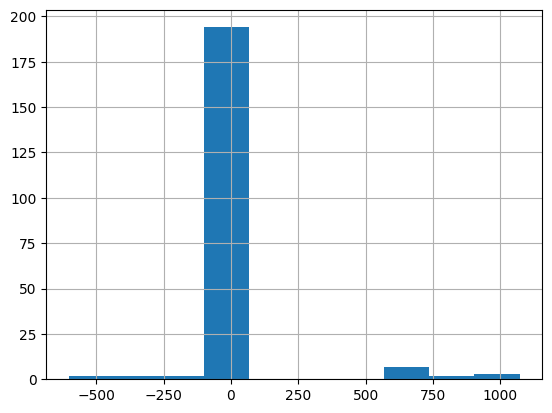

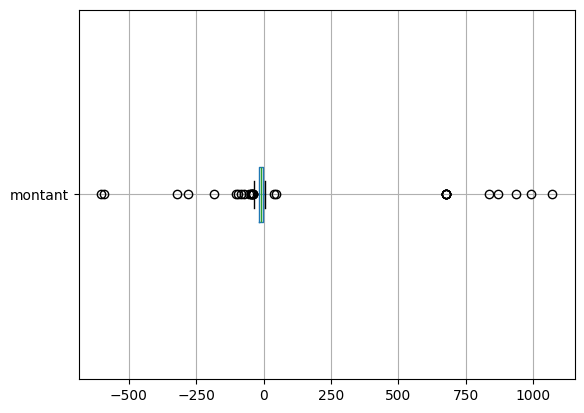

--------------------
Catégorie : TRANSPORT
moy:
 -52.99714285714286
med:
 -53.1
mod:
 0   -73.0
Name: montant, dtype: float64
var:
 2205.016868027212
eca:
 46.95760713694014


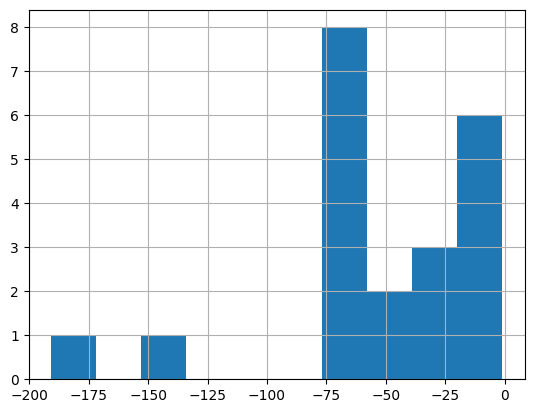

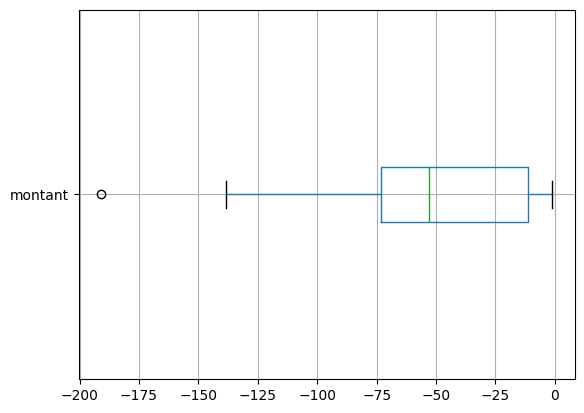

--------------------
Catégorie : FACTURE TELEPHONE
moy:
 -7.973333333333333
med:
 -7.02
mod:
 0   -7.02
1   -6.38
Name: montant, dtype: float64
var:
 6.432222222222222
eca:
 2.536182608216968


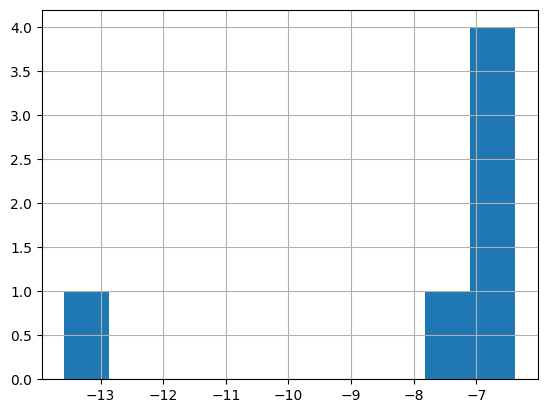

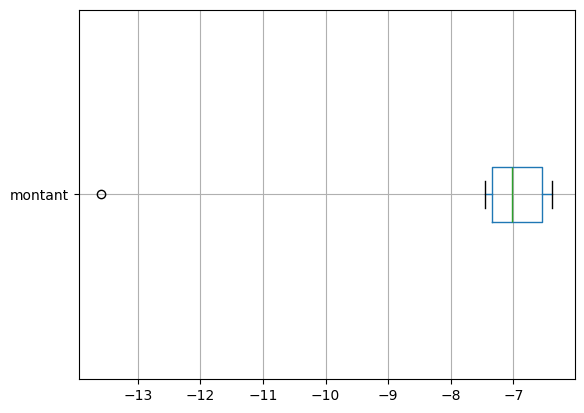

--------------------
Catégorie : COURSES
moy:
 -16.34128205128205
med:
 -12.24
mod:
 0    -60.16
1    -42.45
2    -42.42
3    -33.55
4    -32.67
5    -29.18
6    -28.11
7    -27.68
8    -26.58
9    -26.19
10   -23.43
11   -22.59
12   -21.73
13   -20.59
14   -18.45
15   -17.16
16   -13.59
17   -12.96
18   -12.49
19   -12.24
20   -10.91
21   -10.36
22    -9.88
23    -9.60
24    -9.31
25    -9.11
26    -6.89
27    -6.80
28    -6.60
29    -5.88
30    -4.63
31    -4.41
32    -4.39
33    -3.48
34    -2.93
35    -2.56
36    -2.51
37    -1.90
38    -0.94
Name: montant, dtype: float64
var:
 177.02535476660088
eca:
 13.3050875520081


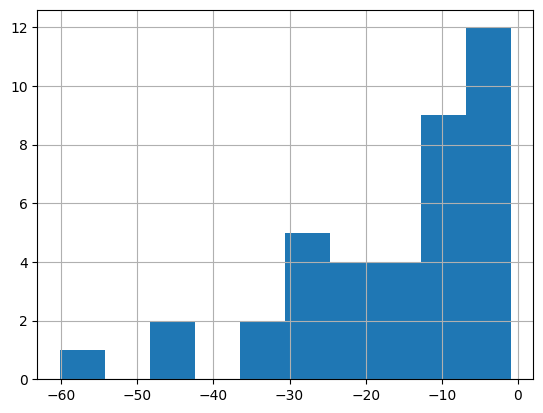

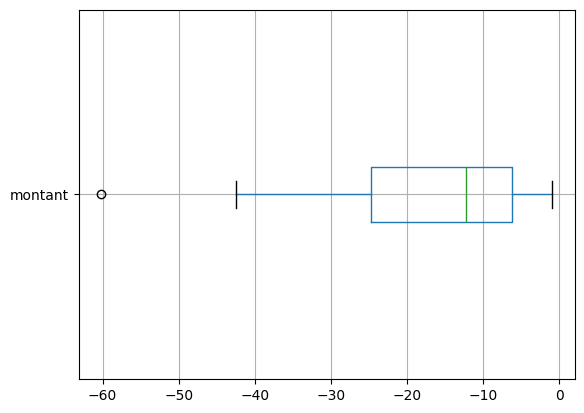

--------------------
Catégorie : COTISATION BANCAIRE
moy:
 -1.8857142857142857
med:
 -1.92
mod:
 0   -1.92
Name: montant, dtype: float64
var:
 0.0015673469387755044
eca:
 0.03958973274443141


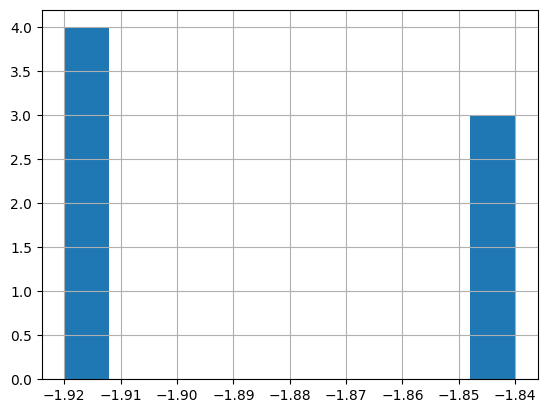

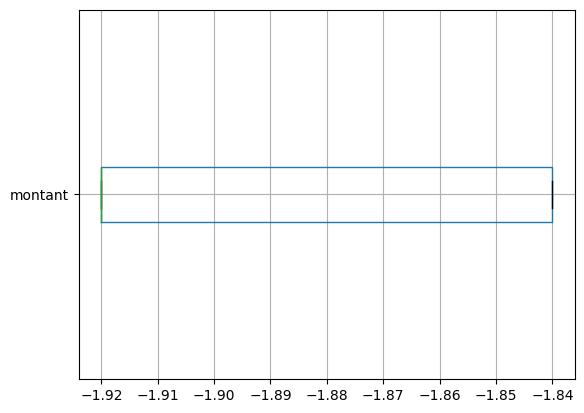

--------------------
Catégorie : RESTAURANT
moy:
 -10.3325
med:
 -10.1
mod:
 0   -9.2
Name: montant, dtype: float64
var:
 2.853193750000001
eca:
 1.689139943876765


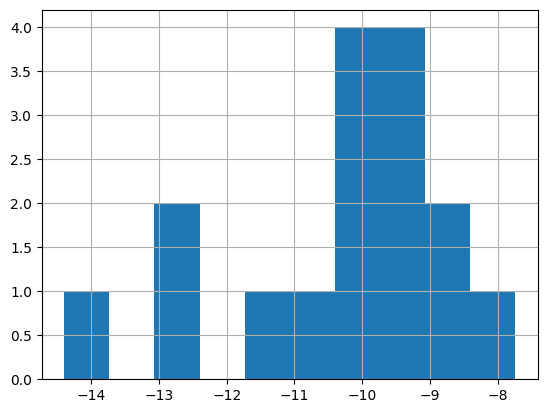

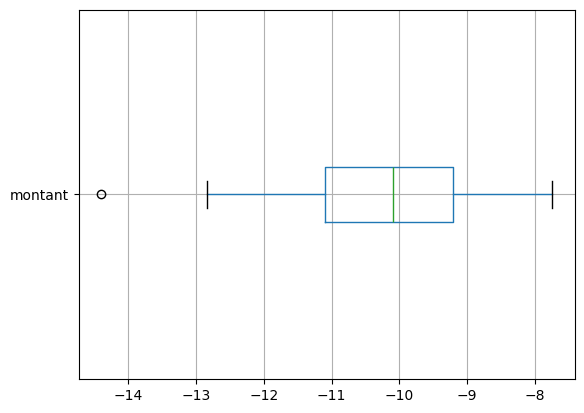

--------------------
Catégorie : LOYER
moy:
 -345.0
med:
 -345.0
mod:
 0   -345.0
Name: montant, dtype: float64
var:
 0.0
eca:
 0.0


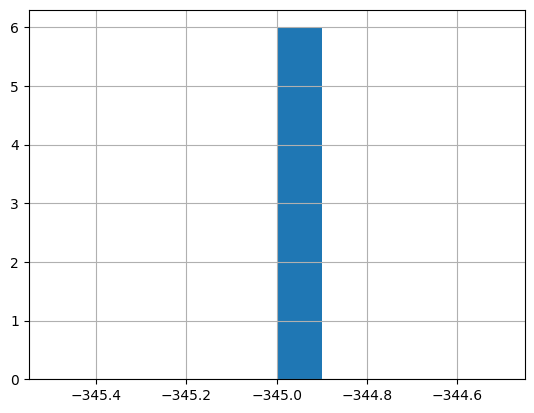

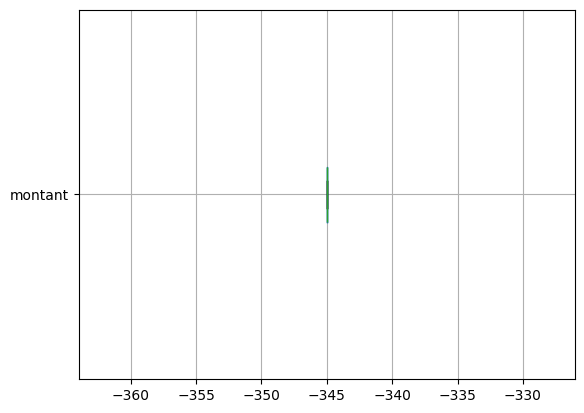

--------------------
Catégorie : PRELEVEMENT XX TELEPHONE XX XX
moy:
 -36.48
med:
 -36.48
mod:
 0   -36.48
Name: montant, dtype: float64
var:
 0.0
eca:
 0.0


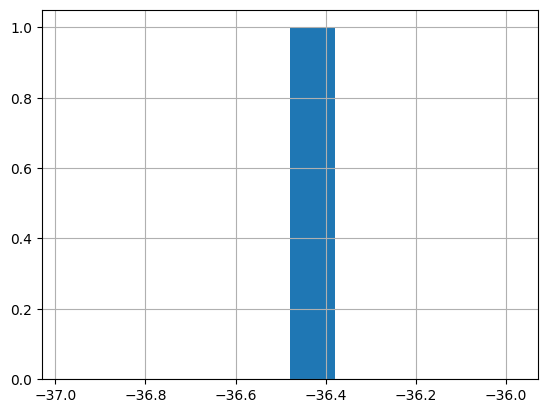

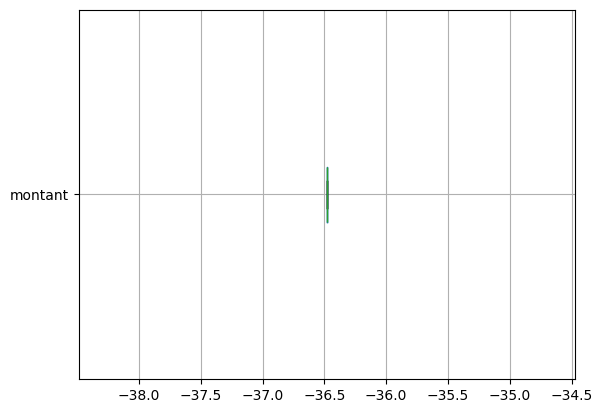

In [ ]:
for cat in data['categ'].unique():

  mask= data['categ'] == cat
  subset =  data[mask]
  print("-"*20)
  print(f"Catégorie : {cat}")
  print("moy:\n",subset['montant'].mean())
  print("med:\n",subset['montant'].median())
  print("mod:\n",subset['montant'].mode())
  print("var:\n",subset['montant'].var(ddof=0))
  print("eca:\n",subset['montant'].std(ddof=0))
  subset['montant'].hist()
  plt.show()
  subset.boxplot(column='montant',vert=False)
  plt.show()


